<a href="https://colab.research.google.com/github/molabokchi/bokchi_open_lab/blob/main/demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 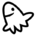 deepdriver quickstart!

welecome to deepdriver! 😀

You can refer to the guide document.
https://bokchi.gitbook.io/deepdriver-ce/

# 0. 💻 install deepdriver & requirement package for train

In [209]:
pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached protobuf-3.19.6-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (1.1 MB)
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.0
    Uninstalling protobuf-3.20.0:
      Successfully uninstalled protobuf-3.20.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
grpcio-tools 1.51.1 requires protobuf<5.0dev,>=4.21.6, but you have protobuf 3.19.6 which is incompatible.


In [210]:
pip install deepdriver==0.3.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached protobuf-4.21.12-cp37-abi3-manylinux2014_x86_64.whl (409 kB)
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.19.6
    Uninstalling protobuf-3.19.6:
      Successfully uninstalled protobuf-3.19.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.9.2 requires protobuf<3.20,>=3.9.2, but you have protobuf 4.21.12 which is incompatible.
tensorflow-metadata 1.12.0 requires protobuf<4,>=3.13, but you have protobuf 4.21.12 which is incompatible.
tensorboard 2.9.1 requires protobuf<3.20,>=3.9.2, but you have protobuf 4.21.12 which is incompatible.


In [211]:
pip install protobuf==3.20.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached protobuf-3.20.0-cp38-cp38-manylinux_2_5_x86_64.manylinux1_x86_64.whl (1.0 MB)
  Attempting uninstall: protobuf
    Found existing installation: protobuf 4.21.12
    Uninstalling protobuf-4.21.12:
      Successfully uninstalled protobuf-4.21.12
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.9.2 requires protobuf<3.20,>=3.9.2, but you have protobuf 3.20.0 which is incompatible.
tensorboard 2.9.1 requires protobuf<3.20,>=3.9.2, but you have protobuf 3.20.0 which is incompatible.
grpcio-tools 1.51.1 requires protobuf<5.0dev,>=4.21.6, but you have protobuf 3.20.0 which is incompatible.
googleapis-common-protos 1.57.0 requires protobuf!=3.20.0,!=3.20.1,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<5.0.0dev,>=3.19.5, but you have protobuf 3.2

#1. ➕ import deepdriver & deeplearnig framework



In [212]:
import tensorflow as tf

In [213]:
import deepdriver

#2. prepare dataset

In [214]:
!wget --no-check-certificate \
https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
-O /tmp/cats_and_dogs_filtered.zip

--2022-12-19 08:10:02--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.194.128, 173.194.195.128, 173.194.196.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.194.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M   232MB/s    in 0.3s    

2022-12-19 08:10:03 (232 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [215]:
import os
import zipfile
import shutil

train_dir = '/content/cat_dog/'
if os.path.isdir(train_dir):
  shutil.rmtree(train_dir)
  os.mkdir(train_dir)
else:
  os.mkdir(train_dir)

model_dir = '/content/model'

if os.path.isdir(model_dir):
  shutil.rmtree(model_dir)
  os.mkdir(model_dir)
else:
  os.mkdir(model_dir)
local_zip = '/tmp/cats_and_dogs_filtered.zip'
data_dir ='/tmp/cats_and_dogs_filtered/train'
data_doc_dir='/tmp/cats_and_dogs_filtered/train/dogs'
data_cat_dir='/tmp/cats_and_dogs_filtered/train/cats'
valid_dir ='/tmp/cats_and_dogs_filtered/validation'
data_dog_valid_dir='/tmp/cats_and_dogs_filtered/validation/dogs'
data_cat_valid_dir='/tmp/cats_and_dogs_filtered/validation/cats'
zip_ref = zipfile.ZipFile(local_zip, 'r')

zip_ref.extractall('/tmp')
zip_ref.close()

In [216]:
# train용 폴더 생성
train_set_dir = os.path.join(train_dir, 'train_set')
os.mkdir(train_set_dir)
train_dog_dir = os.path.join(train_set_dir, 'dog')
os.mkdir(train_dog_dir)
train_cat_dir = os.path.join(train_set_dir, 'cat')
os.mkdir(train_cat_dir)
# valid용 폴더 생성
valid_set_dir = os.path.join(train_dir, 'valid_set')
os.mkdir(valid_set_dir)
valid_dog_dir = os.path.join(valid_set_dir, 'dog')
os.mkdir(valid_dog_dir)
valid_cat_dir = os.path.join(valid_set_dir, 'cat')
os.mkdir(valid_cat_dir)
# test용 폴더 생성
test_set_dir = os.path.join(train_dir, 'test_set')
os.mkdir(test_set_dir)
test_dog_dir = os.path.join(test_set_dir, 'dog')
os.mkdir(test_dog_dir)
test_cat_dir = os.path.join(test_set_dir, 'cat')
os.mkdir(test_cat_dir)

In [217]:
# image file name list 생성
import shutil
total_data_count =1000
train_data_count =int(total_data_count*0.8)
test_data_count = int(total_data_count*0.1)
valid_data_count =total_data_count - train_data_count -test_data_count
dog_files = [f'dog.{i}.jpg' for i in range(total_data_count)]
cat_files = [f'cat.{i}.jpg' for i in range(total_data_count)]

 
# 각 폴더로 image 이동
for file in dog_files[:train_data_count]:
    src = os.path.join(data_doc_dir, file)
    dst = os.path.join(train_dog_dir, file)
    shutil.move(src, dst)
    
for file in dog_files[train_data_count:train_data_count+test_data_count]:
    src = os.path.join(data_doc_dir, file)
    dst = os.path.join(valid_dog_dir, file)
    shutil.move(src, dst)
 
for file in dog_files[train_data_count+test_data_count:total_data_count]:
    src = os.path.join(data_doc_dir, file)
    dst = os.path.join(test_dog_dir, file)
    shutil.move(src, dst)
 
for file in cat_files[:train_data_count]:
    src = os.path.join(data_cat_dir, file)
    dst = os.path.join(train_cat_dir, file)
    shutil.move(src, dst)
    
for file in cat_files[train_data_count:train_data_count+test_data_count]:
    src = os.path.join(data_cat_dir, file)
    dst = os.path.join(valid_cat_dir, file)
    shutil.move(src, dst)
 
for file in cat_files[train_data_count+test_data_count:total_data_count]:
    src = os.path.join(data_cat_dir, file)
    dst = os.path.join(test_cat_dir, file)
    shutil.move(src, dst)

In [218]:
train_cat_fnames = os.listdir( train_cat_dir )
train_dog_fnames = os.listdir( train_dog_dir )

In [219]:
print('Total training cat images :', len(os.listdir(train_cat_dir)))
print('Total training dog images :', len(os.listdir(train_dog_dir)))

print('Total validation cat images :', len(os.listdir(valid_cat_dir)))
print('Total validation dog images :', len(os.listdir(valid_dog_dir)))


print('Total test cat images :', len(os.listdir(test_cat_dir)))
print('Total test dog images :', len(os.listdir(test_dog_dir)))

Total training cat images : 800
Total training dog images : 800
Total validation cat images : 100
Total validation dog images : 100
Total test cat images : 100
Total test dog images : 100


#2. ⚙ deepdriver server setting

In [220]:
deepdriver.setting(http_host="quick-experience.bokchi.com:9011" ,grpc_host="quick-experience.bokchi.com:19051")

#3. 🔌 log in to deepdriver

In [221]:
deepdriver.login(key="OWFkMmQyMjA1N2UyM2ViZjBiZmYxNjQ3ODQ5ZDAxYmRlNTBhMmFiZWJhZDAxNTQ5M2MyMDc0ZWJhNGY3NWI1ZQ==")

True

#4. 🥼 create experiment and run

In [222]:
experiment_name="exp_cat_dog_cnn_epoch_10_batch_64"

In [223]:
artifact_name ="cat_dog_cnn_model"

In [224]:
# experiment init & config hyperparam
deepdriver.init(exp_name= experiment_name, 
                config={ 'architecture':"CNN", 'epoch': 10, 'batch_size': 64, 'hidden_layer':512, 'learning_rate': 0.001})

2022-12-19 08:10:06,205 INFO [deepdriver] [experiment.py:21] - DeepDriver initialized
Team Name=molamola.babo
Exp Name=exp_cat_dog_cnn_epoch_10_batch_64
Run Name=run-1
Run URL=http://quick-experience.bokchi.com:9111/experi/molamola.babo/exp_cat_dog_cnn_epoch_10_batch_64/run-1/run/chart


INFO:deepdriver:DeepDriver initialized
Team Name=molamola.babo
Exp Name=exp_cat_dog_cnn_epoch_10_batch_64
Run Name=run-1
Run URL=http://quick-experience.bokchi.com:9111/experi/molamola.babo/exp_cat_dog_cnn_epoch_10_batch_64/run-1/run/chart


#5. 📚 train your code and send log

make model

In [225]:
import tensorflow as tf


model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(deepdriver.config.hidden_layer, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_21 (Conv2D)          (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 74, 74, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_22 (Conv2D)          (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 36, 36, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_23 (Conv2D)          (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_23 (MaxPoolin  (None, 17, 17, 64)      

In [226]:
from tensorflow.keras.optimizers import RMSprop

model.compile(optimizer=RMSprop(lr=deepdriver.config.learning_rate),
            loss='binary_crossentropy',
            metrics = ['accuracy'])

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


data load

In [227]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


train_datagen = ImageDataGenerator( rescale = 1.0/255. )
test_datagen  = ImageDataGenerator( rescale = 1.0/255. )
valid_datagen  = ImageDataGenerator( rescale = 1.0/255. )

train_generator = train_datagen.flow_from_directory(train_set_dir,
                                                  batch_size=deepdriver.config.batch_size,
                                                  class_mode='binary',
                                                  target_size=(150, 150))
validation_generator =  valid_datagen.flow_from_directory(valid_set_dir,
                                                       batch_size=deepdriver.config.batch_size,
                                                       class_mode  = 'binary',
                                                       target_size = (150, 150))

test_generator =  test_datagen.flow_from_directory(test_set_dir,
                                                       batch_size=deepdriver.config.batch_size,
                                                       class_mode  = 'binary',
                                                       target_size = (150, 150))

Found 1600 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


add deepdriver.log() in train function

In [228]:
class CustomCallback(tf.keras.callbacks.Callback):

    # def on_train_end(self, logs=None):
    #     keys = list(logs.keys())
    #     deepdriver.finish()

    def on_epoch_end(self, epoch, logs=None):
        keys = list(logs.keys())
        deepdriver.log({"acc": logs["accuracy"], "loss": logs["loss"], "val_acc": logs["val_accuracy"], "val_loss": logs["val_loss"]})
        #deepdriver.log(logs)


train model

In [229]:
steps_per_epoch = train_generator.n//deepdriver.config.batch_size

In [230]:
validation_steps = validation_generator.n//deepdriver.config.batch_size

In [231]:
history = model.fit(train_generator,
                    validation_data=validation_generator,
                    steps_per_epoch=steps_per_epoch,
                    epochs=deepdriver.config.epoch,
                    validation_steps=validation_steps ,
                    callbacks=[CustomCallback()],
                    verbose=2)

Epoch 1/10
25/25 - 8s - loss: 0.8734 - accuracy: 0.5300 - val_loss: 0.6745 - val_accuracy: 0.6042 - 8s/epoch - 316ms/step
Epoch 2/10
25/25 - 5s - loss: 0.6759 - accuracy: 0.6306 - val_loss: 0.6391 - val_accuracy: 0.6615 - 5s/epoch - 204ms/step
Epoch 3/10
25/25 - 5s - loss: 0.6313 - accuracy: 0.6644 - val_loss: 0.6092 - val_accuracy: 0.6667 - 5s/epoch - 206ms/step
Epoch 4/10
25/25 - 5s - loss: 0.5868 - accuracy: 0.7056 - val_loss: 0.7483 - val_accuracy: 0.6146 - 5s/epoch - 204ms/step
Epoch 5/10
25/25 - 5s - loss: 0.5617 - accuracy: 0.7175 - val_loss: 0.5658 - val_accuracy: 0.7083 - 5s/epoch - 203ms/step
Epoch 6/10
25/25 - 5s - loss: 0.5002 - accuracy: 0.7513 - val_loss: 0.5653 - val_accuracy: 0.6927 - 5s/epoch - 204ms/step
Epoch 7/10
25/25 - 5s - loss: 0.4402 - accuracy: 0.7831 - val_loss: 0.5788 - val_accuracy: 0.7188 - 5s/epoch - 203ms/step
Epoch 8/10
25/25 - 6s - loss: 0.3858 - accuracy: 0.8175 - val_loss: 0.7017 - val_accuracy: 0.6667 - 6s/epoch - 246ms/step
Epoch 9/10
25/25 - 5s - 

In [232]:
model.save(model_dir+"/cat_dog_cnn_model")

#6. ⬆ upload artifact(Model)

In [242]:
arti = deepdriver.Artifacts(name=artifact_name,type="model")

In [243]:
arti.add(model_dir+"/cat_dog_cnn_model")

In [244]:
[(ent.path , ent.digest) for ent in arti.entry_list]

[('variables/variables.data-00000-of-00001',
  'e3bbd7d97ab6e4457ccb4f13c35ed22d'),
 ('variables/variables.index', '1235f5f12228b9efe9b4d932c6e9831e'),
 ('saved_model.pb', '11c6b29a44cb195450931fb16212a07b'),
 ('keras_metadata.pb', '038fa0423c59c204c92233bd28d7896c')]

In [245]:
arti.upload()

Uploading: [./model/cat_dog_cnn_model/keras_metadata.pb] |██████████████████████████████| [100.0%] [4/4]

True

In [246]:
deepdriver.finish()

True

#7. ⬇ create another run & download artifact(Model)

In [247]:
# experiment init & config hyperparam
deepdriver.init(exp_name= experiment_name, 
                config={ 'architecture':"CNN", 'epoch': 10, 'batch_size': 64, 'hidden_layer':512, 'learning_rate': 0.001})

2022-12-19 08:14:35,983 INFO [deepdriver] [experiment.py:21] - DeepDriver initialized
Team Name=molamola.babo
Exp Name=exp_cat_dog_cnn_epoch_10_batch_64
Run Name=run-3
Run URL=http://quick-experience.bokchi.com:9111/experi/molamola.babo/exp_cat_dog_cnn_epoch_10_batch_64/run-3/run/chart


INFO:deepdriver:DeepDriver initialized
Team Name=molamola.babo
Exp Name=exp_cat_dog_cnn_epoch_10_batch_64
Run Name=run-3
Run URL=http://quick-experience.bokchi.com:9111/experi/molamola.babo/exp_cat_dog_cnn_epoch_10_batch_64/run-3/run/chart


In [248]:
arti2 = deepdriver.get_artifact(name=artifact_name,type="model")

2022-12-19 08:14:36,990 INFO [deepdriver] [run.py:38] - artifact is got! 
 artifact id :{13}


INFO:deepdriver:artifact is got! 
 artifact id :{13}


In [249]:
[(ent.path , ent.digest) for ent in arti2.entry_list]

[('keras_metadata.pb', '038fa0423c59c204c92233bd28d7896c'),
 ('saved_model.pb', '11c6b29a44cb195450931fb16212a07b'),
 ('variables/variables.data-00000-of-00001',
  'e3bbd7d97ab6e4457ccb4f13c35ed22d'),
 ('variables/variables.index', '1235f5f12228b9efe9b4d932c6e9831e')]

In [250]:
arti2.download()

Downloading: [./deepdriver/artifact/13/V2/variables/variables.index] |██████████████████████████████| [100.0%] [4/4]

'./deepdriver/artifact/13'

#8. model re-train & upload model with another version

In [251]:
reload_model = tf.keras.models.load_model(arti2.get_download_dir())

In [252]:
history = reload_model.fit(train_generator,
                    validation_data=validation_generator,
                    steps_per_epoch=steps_per_epoch,
                    epochs=deepdriver.config.epoch,
                    validation_steps=validation_steps ,
                    callbacks=[CustomCallback()],
                    verbose=2)

Epoch 1/10
25/25 - 6s - loss: 0.5737 - accuracy: 0.8894 - val_loss: 0.6411 - val_accuracy: 0.6823 - 6s/epoch - 240ms/step
Epoch 2/10
25/25 - 5s - loss: 0.1735 - accuracy: 0.9400 - val_loss: 0.6984 - val_accuracy: 0.7344 - 5s/epoch - 198ms/step
Epoch 3/10
25/25 - 5s - loss: 0.1359 - accuracy: 0.9538 - val_loss: 0.8388 - val_accuracy: 0.7188 - 5s/epoch - 206ms/step
Epoch 4/10
25/25 - 5s - loss: 0.1871 - accuracy: 0.9325 - val_loss: 0.8102 - val_accuracy: 0.7031 - 5s/epoch - 201ms/step
Epoch 5/10
25/25 - 5s - loss: 0.0527 - accuracy: 0.9931 - val_loss: 0.9987 - val_accuracy: 0.6719 - 5s/epoch - 214ms/step
Epoch 6/10
25/25 - 5s - loss: 0.1642 - accuracy: 0.9400 - val_loss: 1.0397 - val_accuracy: 0.6510 - 5s/epoch - 206ms/step
Epoch 7/10
25/25 - 5s - loss: 0.0305 - accuracy: 0.9962 - val_loss: 1.4530 - val_accuracy: 0.6823 - 5s/epoch - 199ms/step
Epoch 8/10
25/25 - 5s - loss: 0.3104 - accuracy: 0.9481 - val_loss: 0.9791 - val_accuracy: 0.6875 - 5s/epoch - 201ms/step
Epoch 9/10
25/25 - 5s - 

In [253]:
reload_model.save(model_dir+"/cat_dog_cnn_model2")

In [254]:
arti = deepdriver.get_artifact(name=artifact_name,type="model")

2022-12-19 08:15:41,303 INFO [deepdriver] [run.py:38] - artifact is got! 
 artifact id :{13}


INFO:deepdriver:artifact is got! 
 artifact id :{13}


In [255]:
arti.add(model_dir+"/cat_dog_cnn_model2")

In [256]:
[(ent.path ,ent.status, ent.digest) for ent in arti.entry_list]

[('keras_metadata.pb', 'SYNC', '9663531aa996834367964bbd6d4f3e66'),
 ('saved_model.pb', 'SYNC', '1cb1bb33c94fcda32998ceb364bdc703'),
 ('variables/variables.data-00000-of-00001',
  'SYNC',
  'c0464823d579c499c2426dc64ecea71d'),
 ('variables/variables.index', 'SYNC', '49f08a8bb161c8253ee1a534abf8c2bf')]

In [257]:
arti.upload()

Uploading: [./model/cat_dog_cnn_model2/variables/variables.index] |██████████████████████████████| [100.0%] [4/4]

True

In [258]:
deepdriver.finish()

True